# RATING PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Rating_Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,Its an absolute beast if u know what are the n...
1,1,5,This is the best laptop in this range.I reciev...
2,2,5,Good product as used of now.... Everything is ...
3,3,5,AWESOME LAPTOP. It supports many high spec gam...
4,4,4,For that price... it's exceptionally good. Pla...


In [3]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
print('shape = >',Rating.shape)

shape = > (39369, 2)


### Observation:

There are 39369 rows and 2 columns present in our dataset.

In [5]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    21394
4     7461
1     5654
3     3186
2     1674
Name: Ratings, dtype: int64


### Observation:

Maximum, 21394 number of ratings present is of 5 star and minimum, 1674 is of 2 star.

In [6]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

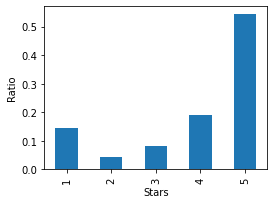

In [7]:
plot_labels(Rating, "stars")

### We can observe that the dataset is imbalanced.

In [8]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,Its an absolute beast if u know what are the n...,500
1,5,This is the best laptop in this range.I reciev...,500
2,5,Good product as used of now.... Everything is ...,271
3,5,AWESOME LAPTOP. It supports many high spec gam...,96
4,4,For that price... it's exceptionally good. Pla...,342


### Here we create another column length based on the length of reviews.

In [9]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39369 entries, 0 to 39368
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      39369 non-null  int64 
 1   Full_review  39369 non-null  object
 2   length       39369 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 922.8+ KB


In [10]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

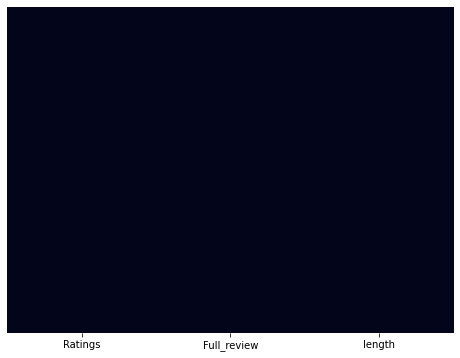

In [11]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

### Observation:

Thus we confirm that there are no missing values present in our dataset.

In [12]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [13]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [15]:
Rating.head()

,Ratings,Full_review,length
0,5,its an absolute beast if u know what are the n...,500
1,5,this is the best laptop in this range i reciev...,500
2,5,good product as used of now everything is good...,271
3,5,awesome laptop it supports many high spec game...,96
4,4,for that price it s exceptionally good played ...,342


In [16]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Full_review'] = Rating['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [17]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [18]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,absolute beast know necessary steps follow com...,500,294
1,5,best laptop range recieved late delivery due b...,500,337
2,5,good product used everything good also ssd slo...,271,150
3,5,awesome laptop supports many high spec games l...,96,84
4,4,price exceptionally good played far cry numbr ...,342,254


In [19]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 2383903
clean Review length 1692896


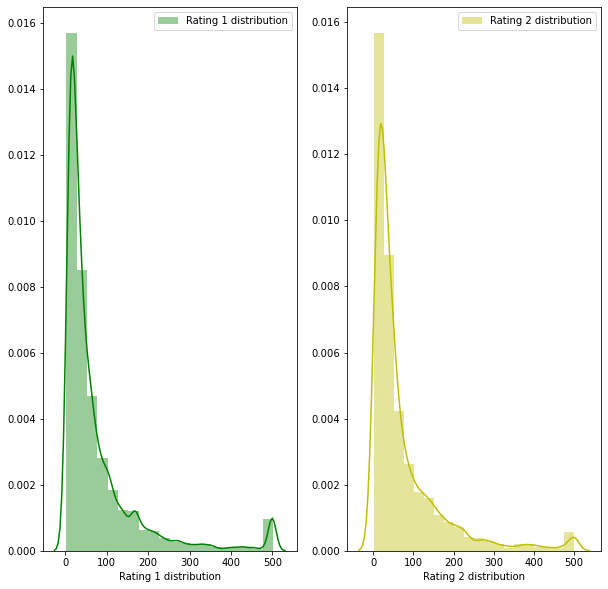

In [20]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

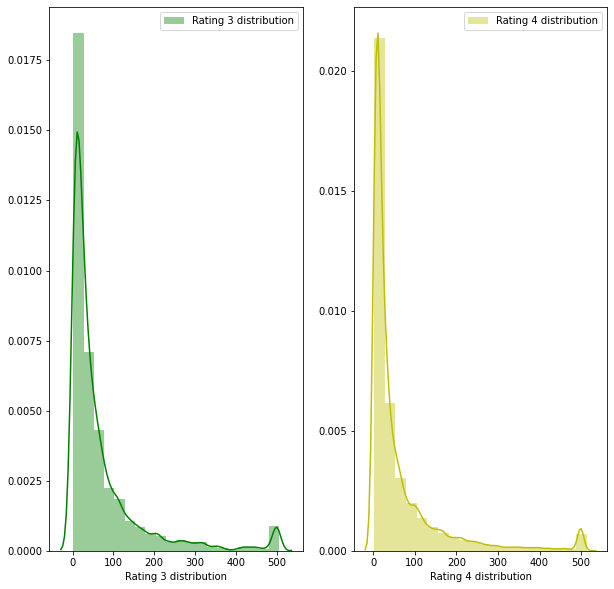

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='y')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

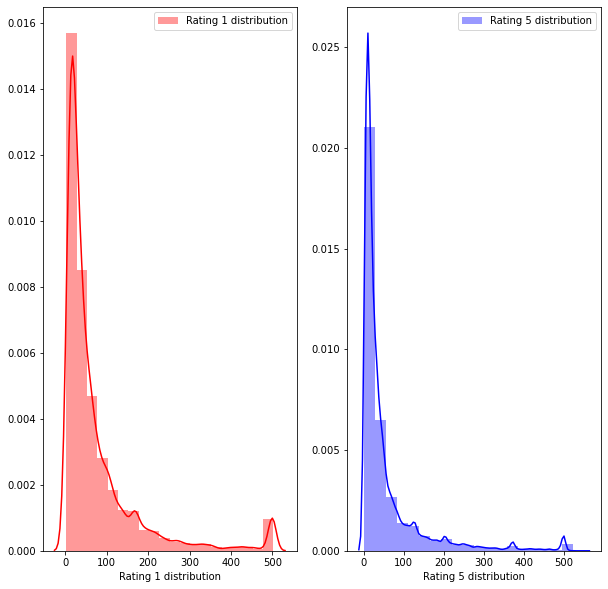

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

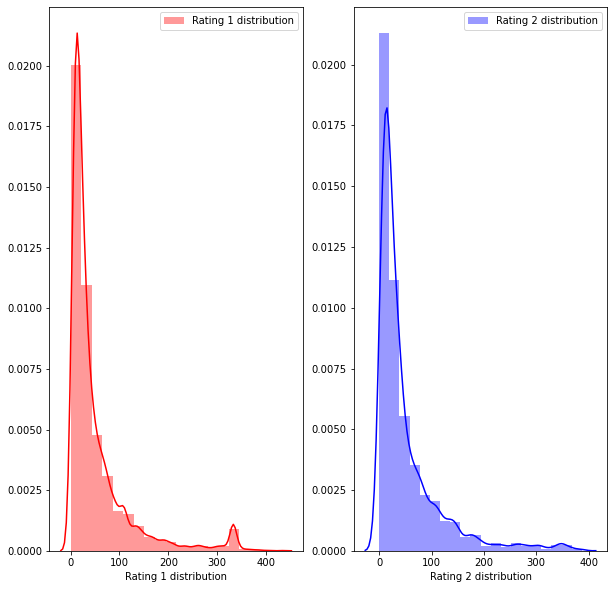

In [23]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='b')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

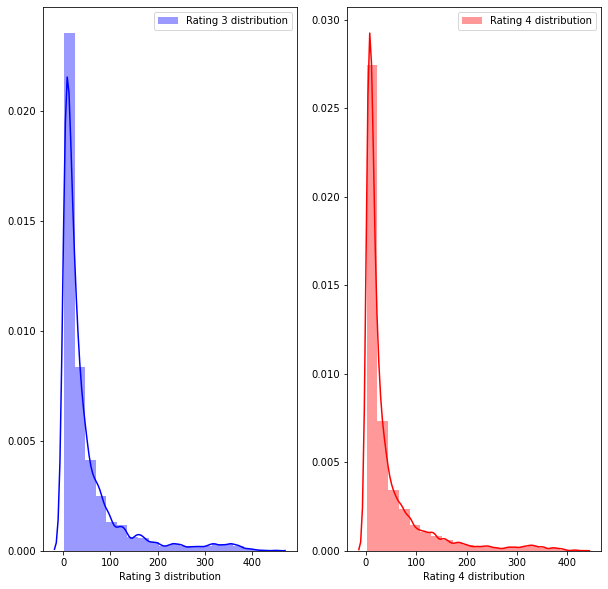

In [24]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='b')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

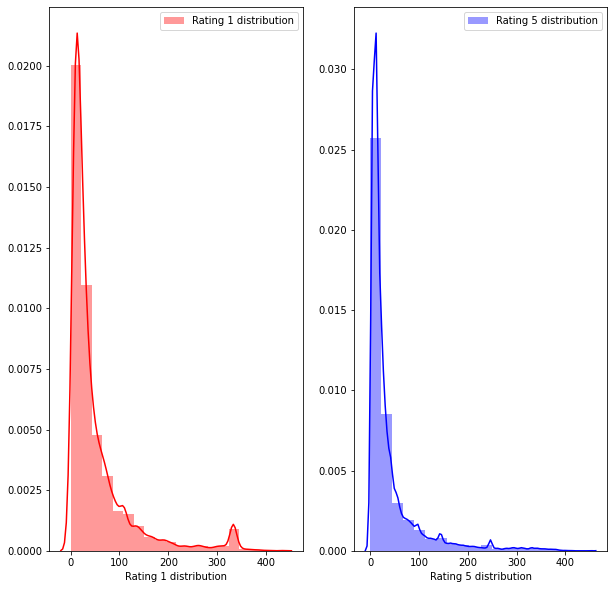

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

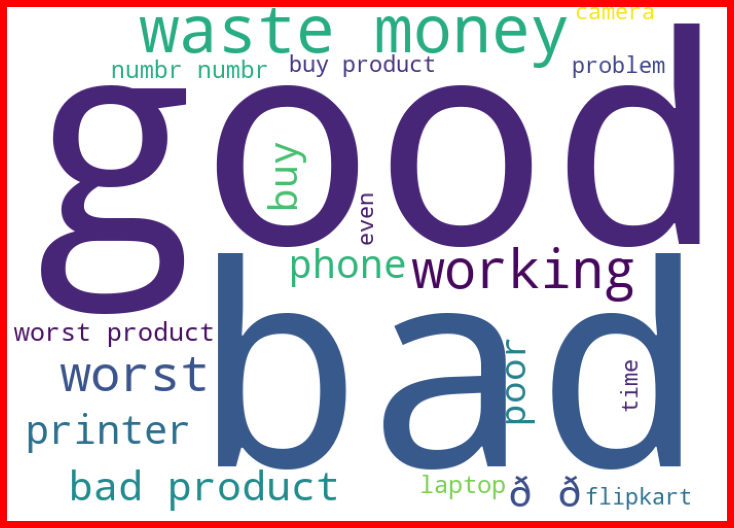

In [26]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Full_review'][Rating['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

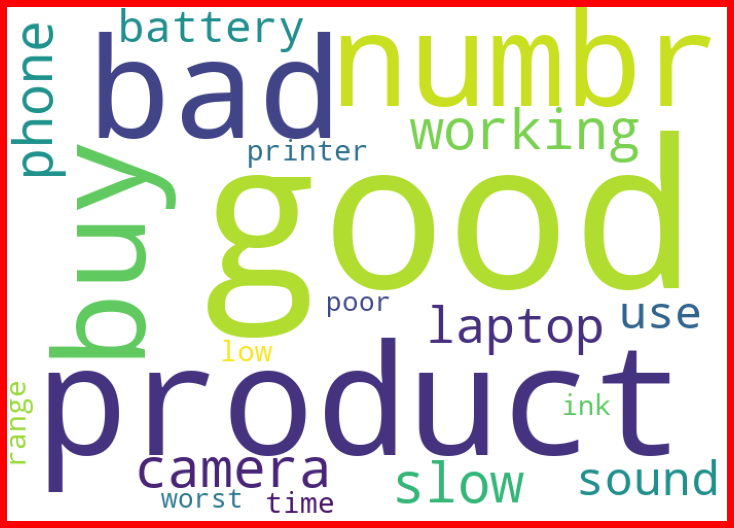

In [27]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Full_review'][Rating['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

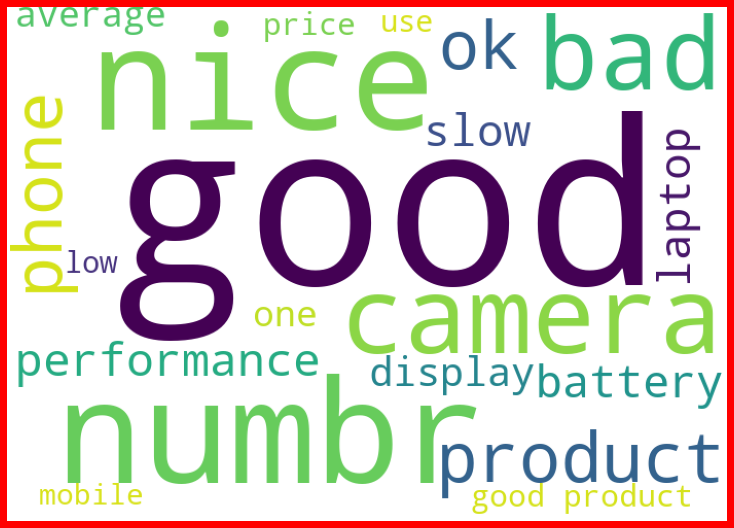

In [28]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Full_review'][Rating['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

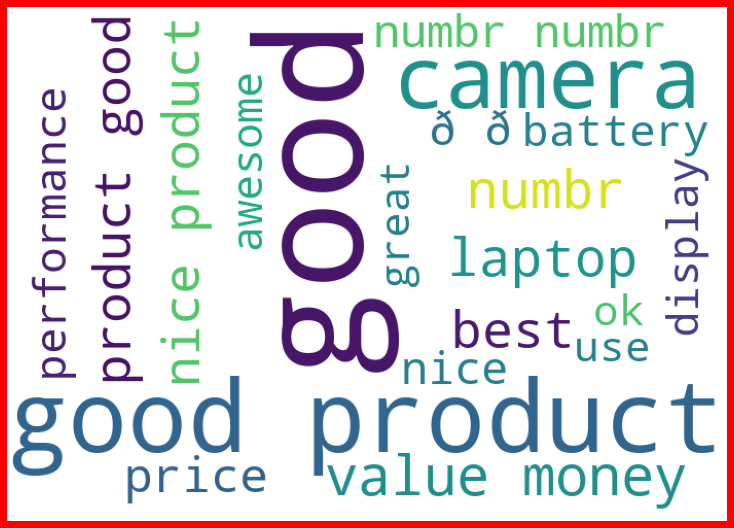

In [29]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Full_review'][Rating['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

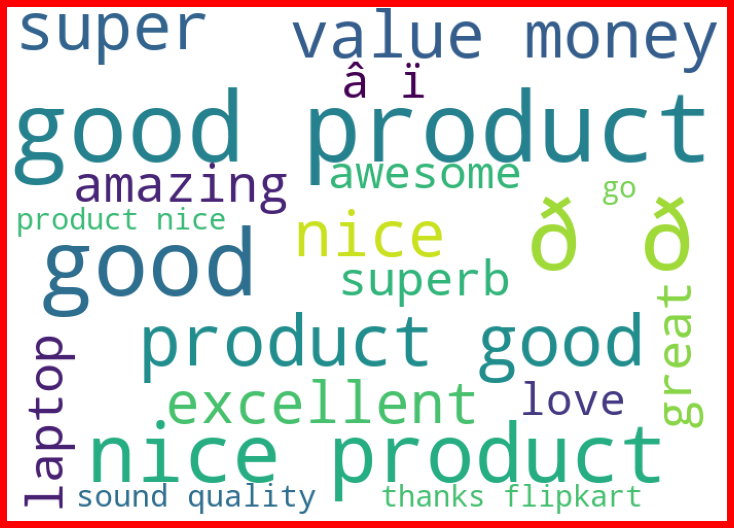

In [30]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Full_review'][Rating['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [32]:
x=feature1

In [33]:
y=Rating['Ratings']

In [34]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [35]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4: 20000, 5: 20000})
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 17113, 4: 5989, 1: 4541, 3: 2505, 2: 1347})
The number of classes after fit Counter({5: 19954, 4: 19898, 1: 19857, 3: 19853, 2: 19832})


In [36]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [37]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [38]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.32778765557531114


Cross_Val_Score =  0.5403473805423221


classification_report
               precision    recall  f1-score   support

           1       0.37      0.56      0.45      1113
           2       0.07      0.33      0.12       327
           3       0.11      0.26      0.15       681
           4       0.25      0.25      0.25      1472
           5       0.81      0.30      0.44      4281

    accuracy                           0.33      7874
   macro avg       0.32      0.34      0.28      7874
weighted avg       0.55      0.33      0.37      7874



[[ 624  340   84   43   22]
 [ 151  108   39   25    4]
 [ 183  170  180  104   44]
 [ 212  239  419  366  236]
 [ 516  603  936  923 1303]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeC

AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** MultinomialNB ********************************************************


MultinomialNB()


Accuracy_score =  0.49453898907797816


Cross_Val_Score =  0.6232823667374977


classification_report
               precision    recall  f1-score   support

           1       0.69      0.62      0.65      1113
           2       0.16      0.33      0.21       327
           3       0.22      0.33      0.26       681
           4       0.29      0.48      0.36      1472
           5       0.81      0.51      0.62      4281

    accuracy                           0.49      7874
   macro avg       0.43      0.45      0.42      7874
weighted avg       0.62      0.49      0.53      7874



[[ 685  259   83   55   31]
 [  98  109   73   33   14]
 [  72  121  226  182   80]
 [  42   80  264  708  378]
 [  93  133  397 1492 2166]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************************

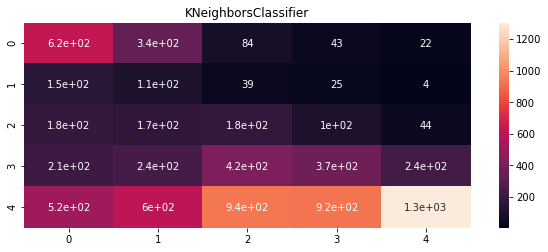

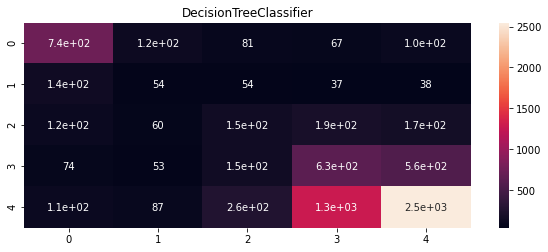

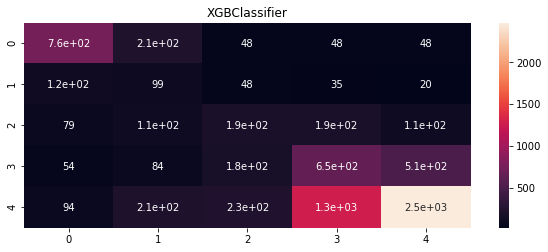

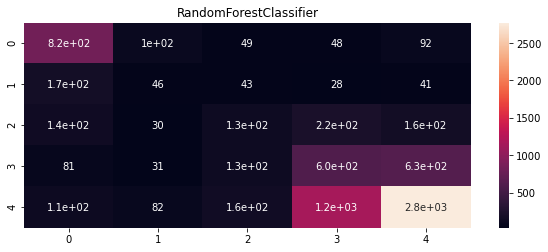

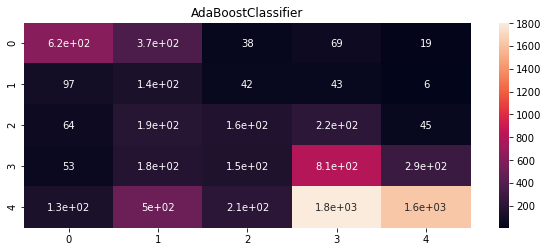

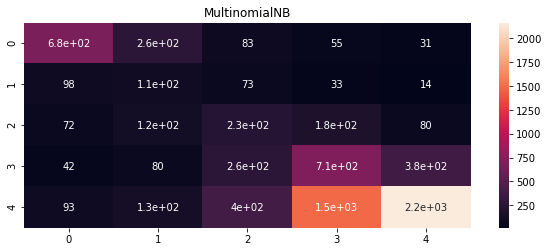

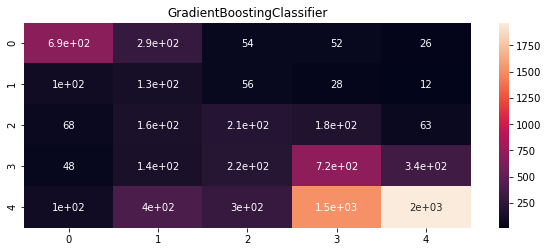

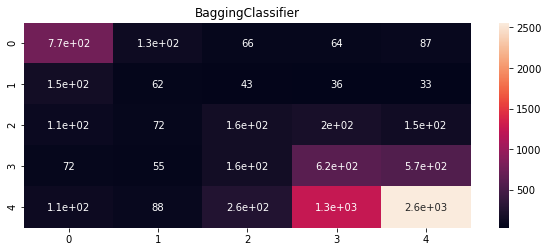

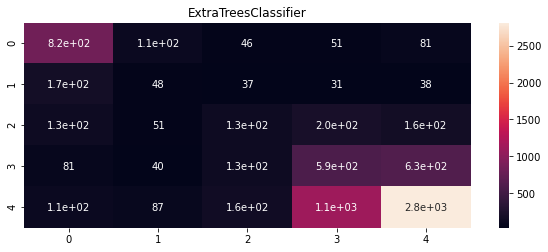

In [39]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [40]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,32.778766,54.034738
1,DecisionTreeClassifier,52.298705,56.897601
2,XGBClassifier,52.819406,63.336622
3,RandomForestClassifier,55.613411,63.138502
4,AdaBoostClassifier,42.684785,61.995473
5,MultinomialNB,49.453899,62.328237
6,GradientBoostingClassifier,47.129794,61.959915
7,BaggingClassifier,52.908306,59.966022
8,ExtraTreesClassifier,55.930912,62.356178


## Using gridsearch cv to find the best parameters in random forest

In [41]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [42]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.5486410972821946
[[ 839   96   52   51   75]
 [ 153   62   49   37   26]
 [ 111   70  190  189  121]
 [  64   37  177  675  519]
 [ 100   56  224 1347 2554]]
              precision    recall  f1-score   support

           1       0.66      0.75      0.71      1113
           2       0.19      0.19      0.19       327
           3       0.27      0.28      0.28       681
           4       0.29      0.46      0.36      1472
           5       0.78      0.60      0.67      4281

    accuracy                           0.55      7874
   macro avg       0.44      0.46      0.44      7874
weighted avg       0.60      0.55      0.57      7874



In [43]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,32.778766,54.034738
1,DecisionTreeClassifier,52.298705,56.897601
2,XGBClassifier,52.819406,63.336622
3,RandomForestClassifier,55.613411,63.138502
4,AdaBoostClassifier,42.684785,61.995473
5,MultinomialNB,49.453899,62.328237
6,GradientBoostingClassifier,47.129794,61.959915
7,BaggingClassifier,52.908306,59.966022
8,ExtraTreesClassifier,55.930912,62.356178


### Random forest classifier is giving us best results so we save it as our final model.

In [44]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [45]:
model=joblib.load('Ratings_prediction.csv')

In [46]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5 4 4 4 5 3 5 1 5 4 5 4 1 5 5 5 5 3 5 1 4 5 4 5 1 5 4 5 4 5 4 4 4 3 5 4 5
 4 4 5 5 5 5 5 5 5 4 1 5 1 4 1 5 2 4 5 1 5 5 4 1 1 5 5 4 1 5 5 5 1 1 5 5 5
 5 3 2 1 5 4 4 1 5 4 5 4 4 4 1 4 5 4 4 5 5 1 5 5 4 4 1 5 4 5 4 5 4 1 4 5 4
 4 5 3 1 5 3 5 5 4 2 1 5 1 4 1 3 3 5 5 5 4 5 2 5 4 5 1 5 5 5 4 5 5 1 4 1 5
 5 5 1 5 5 5 5 5 1 4 5 4 4 5 5 4 5 5 2 1 3 2 5 5 5 5 2 5 5 4 5 1 3 5 1 5 4
 4 2 5 4 4 2 5 1 4 5 4 1 1 5 1 4 5 4 5 4 4 4 5 5 5 4 4 5 5 4 5 5 3 5 5 4 3
 5 5 5 4 5 5 4 2 5 4 4 5 5 4 4 5 4 1 1 5 5 4 1 4 5 3 1 4 4 5 5 1 5 4 1 2 4
 1 4 5 1 4 1 1 5 2 1 1 1 1 5 4 3 5 1 5 1 3 1 5 1 5 4 3 5 1 5 1 5 5 5 4 5 1
 4 1 5 5 4 5 5 4 5 5 5 1 5 5 4 4 1 4 5 1 5 4 5 5 5 4 4 1 5 4 4 5 5 5 5 5 2
 5 5 4 5 3 5 5 4 1 4 3 1 3 3 2 5 1 5 4 5 1 4 4 5 5 1 4 5 5 3 4 5 5 2 5 5 5
 5 5 5 5 5 5 5 5 4 5 4 5 4 1 5 4 5 5 5 1 4 1 5 4 2 1 2 4 5 1 4 5 3 5 4 5 4
 5 1 5 1 2 1 5 4 4 4 5 5 2 4 1 5 4 5 4 5 1 4 5 4 5 4 1 4 5 3 3 4 4 4 4 3 4
 4 5 5 4 1 4 5 1 5 4 5 4 3 5 5 4 5 3 4 5 5 3 5 5 5 5 1 4 4 2 4 1 1 1 5 5 5
 5 5 5 5 5 4 5 1 1 5 5 4 